In [1]:
# !pip install iterative-stratification
!pip install mmcv-full

     |████████████████████████████████| 231 kB 2.9 MB/s 
     |████████████████████████████████| 185 kB 12.5 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.2.7-cp37-cp37m-linux_x86_64.whl size=20707526 sha256=25be0a183425aa762426fa2724484f3212e3e45faa1fd7af83c2e8d648a22232
  Stored in directory: /root/.cache/pip/wheels/3f/3d/5e/dbc82b2ea5f1e14d4fe044aea9aeb02a8a9402c051529659c2
Successfully built mmcv-full


In [2]:
# Install mmcls
!git clone https://github.com/open-mmlab/mmclassification.git
%cd mmclassification
!pip install -e .

Cloning into 'mmclassification'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 1971 (delta 13), reused 15 (delta 6), pack-reused 1928
Receiving objects: 100% (1971/1971), 1.94 MiB | 12.91 MiB/s, done.
Resolving deltas: 100% (1193/1193), done.
/kaggle/working/mmclassification
Obtaining file:///kaggle/working/mmclassification
  Running setup.py develop for mmcls


In [3]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMClassification installation
import mmcls
print(mmcls.__version__)

1.7.0 True
0.9.0


In [4]:
!mkdir checkpoints
# !wget https://download.openmmlab.com/mmclassification/v0/resnet/resnet50_batch256_imagenet_20200708-cfb998bf.pth -P checkpoints
!wget https://download.openmmlab.com/mmclassification/v0/resnext/resnext50_32x4d_batch256_imagenet_20200708-c07adbb7.pth -P checkpoints

--2021-03-28 06:33:31--  https://download.openmmlab.com/mmclassification/v0/resnext/resnext50_32x4d_batch256_imagenet_20200708-c07adbb7.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.35
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100439164 (96M) [application/octet-stream]
Saving to: ‘checkpoints/resnext50_32x4d_batch256_imagenet_20200708-c07adbb7.pth’

resnext50_32x4d_bat 100%[===================>]  95.79M  8.43MB/s    in 11s     

2021-03-28 06:33:44 (8.40 MB/s) - ‘checkpoints/resnext50_32x4d_batch256_imagenet_20200708-c07adbb7.pth’ saved [100439164/100439164]



In [5]:
from mmcls.apis import inference_model, init_model, show_result_pyplot
# Specify the path to config file and checkpoint file
config_file = 'configs/resnext/resnext101_32x4d_b32x8_imagenet.py'
checkpoint_file = 'checkpoints/resnet50_batch256_imagenet_20200708-cfb998bf.pth'
# checkpoint_file = 'checkpoints/resnext50_32x4d_batch256_imagenet_20200708-c07adbb7.pth'
# Specify the device. You may also use cpu by `device='cpu'`.
device = 'cuda:0'
# Build the model from a config file and a checkpoint file
model = init_model(config_file, checkpoint_file, device=device)

/kaggle/working/mmclassification/mmcls/apis/train.py:17: UserWarning: DeprecationWarning: EvalHook and DistEvalHook from mmcls will be deprecated.Please install mmcv through master branch.
  warnings.warn('DeprecationWarning: EvalHook and DistEvalHook from mmcls '


Use load_from_local loader


OSError: checkpoints/resnet50_batch256_imagenet_20200708-cfb998bf.pth is not a checkpoint file

In [6]:
# Test a single image
img = 'demo/demo.JPEG'
result = inference_model(model, img)

NameError: name 'model' is not defined

In [7]:
# Show the results
show_result_pyplot(model, img, result)

NameError: name 'model' is not defined

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv("../../input/vinbigdata-chest-xray-abnormalities-detection/train.csv")

In [10]:
df.head()

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN


In [11]:
df.image_id.nunique()

15000

In [12]:
len(df)

67914

In [13]:
df_new = df.groupby('image_id')['class_id'].apply(list).reset_index()

In [14]:
df_new.head()

,image_id,class_id
0,000434271f63a053c4128a0ba6352c7f,"[14, 14, 14]"
1,00053190460d56c53cc3e57321387478,"[14, 14, 14]"
2,0005e8e3701dfb1dd93d53e2ff537b6e,"[7, 8, 6, 7, 4]"
3,0006e0a85696f6bb578e84fafa9a5607,"[14, 14, 14]"
4,0007d316f756b3fa0baea2ff514ce945,"[13, 11, 3, 11, 13, 0, 5, 5, 0, 11, 13]"


In [15]:
df_new['class_id'] = df_new['class_id'].apply(lambda x: list(set(x)))

In [16]:
df_new.head()

,image_id,class_id
0,000434271f63a053c4128a0ba6352c7f,[14]
1,00053190460d56c53cc3e57321387478,[14]
2,0005e8e3701dfb1dd93d53e2ff537b6e,"[8, 4, 6, 7]"
3,0006e0a85696f6bb578e84fafa9a5607,[14]
4,0007d316f756b3fa0baea2ff514ce945,"[0, 3, 5, 11, 13]"


In [17]:
df['label'] = 0

In [18]:
df.loc[df.class_name!='No finding', ['label']] = 1

In [19]:
df.head()

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,label
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN,0
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN,0
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0,1
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0,1
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN,0


In [20]:
df_with_labels = df.groupby('image_id')['label'].sum().reset_index()

In [21]:
df_with_labels.loc[df_with_labels.label>0,['label']] = 1

In [22]:
df_with_labels.head()

,image_id,label
0,000434271f63a053c4128a0ba6352c7f,0
1,00053190460d56c53cc3e57321387478,0
2,0005e8e3701dfb1dd93d53e2ff537b6e,1
3,0006e0a85696f6bb578e84fafa9a5607,0
4,0007d316f756b3fa0baea2ff514ce945,1


In [23]:
len(df_with_labels)

15000

In [24]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=2)

In [25]:
import numpy as np

In [26]:
image_ids, labels = np.array(df_with_labels.image_id.tolist()), np.array(df_with_labels.label.tolist())

In [27]:
for train_index, test_index in skf.split(image_ids, labels):
    X_train, X_test = image_ids[train_index], image_ids[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

In [28]:
train_df = pd.DataFrame({'id': X_train, 'y': y_train})
val_df = pd.DataFrame({'id': X_test, 'y': y_test})

In [29]:
test_df = pd.read_csv("../../input/vinbigdata-1024-image-dataset/vinbigdata/test.csv")

In [30]:
test_df['image_id']  = test_df['image_id']  + ".png"
test_df['label'] = 0

In [31]:
test_df.head()

,image_id,width,height,label
0,83caa8a85e03606cf57e49147d7ac569.png,2304,2880,0
1,7550347fa2bb96c2354a3716dfa3a69c.png,2538,3095,0
2,74b23792db329cff5843e36efb8aa65a.png,2788,3120,0
3,94568a546be103177cb582d3e91cd2d8.png,1994,2430,0
4,6da36354fc904b63bc03eb3884e0c35c.png,2056,2376,0


In [32]:
test_df[['image_id', 'label']].to_csv('./test.txt', sep=' ', header=False, index=False)

In [33]:
train_df.head()

,id,y
0,000434271f63a053c4128a0ba6352c7f,0
1,00053190460d56c53cc3e57321387478,0
2,0005e8e3701dfb1dd93d53e2ff537b6e,1
3,0006e0a85696f6bb578e84fafa9a5607,0
4,0007d316f756b3fa0baea2ff514ce945,1


In [34]:
train_df['id'] = train_df['id'] + ".png"
val_df['id'] = val_df['id'] + ".png"

In [35]:
train_df.to_csv("./train.txt", sep=" ", header=False, index=False)
val_df.to_csv("./val.txt", sep=" ", header=False, index=False)

In [36]:
import mmcv
import numpy as np

from mmcls.datasets import DATASETS, BaseDataset


# Regist model so that we can access the class through str in configs
@DATASETS.register_module()
class VinBigDataset(BaseDataset):

    def load_annotations(self):
        assert isinstance(self.ann_file, str)

        data_infos = []
        with open(self.ann_file) as f:
            # The ann_file is the annotation files we generate above.
            samples = [x.strip().split(' ') for x in f.readlines()]
            for filename, gt_label in samples:
                info = {'img_prefix': self.data_prefix}
                info['img_info'] = {'filename': filename}
                info['gt_label'] = np.array(gt_label, dtype=np.int64)
                data_infos.append(info)
            return data_infos

In [37]:


# Load the existing config file
from mmcv import Config
# cfg = Config.fromfile('configs/resnet/resnet50_b32x8_imagenet.py')
cfg = Config.fromfile('configs/resnext/resnext101_32x4d_b32x8_imagenet.py')





In [38]:
import os.path as osp
classes = ['normal', 'diseases']
with open(osp.join('./', 'classes.txt'), 'w') as f:
    f.writelines('\n'.join(classes))

In [39]:
# Specify the new dataset class
cfg.dataset_type = 'VinBigDataset'
cfg.data.train.type = cfg.dataset_type
cfg.data.val.type = cfg.dataset_type
cfg.data.test.type = cfg.dataset_type

# Specify the training annotations
cfg.data.train.ann_file = './train.txt'

# The followings are the same as above
cfg.data.samples_per_gpu = 32
cfg.data.workers_per_gpu=2

cfg.img_norm_cfg = dict(
    mean=[124.508, 116.050, 106.438], std=[58.577, 57.310, 57.437], to_rgb=True)

cfg.data.train.data_prefix = '../../input/vinbigdata-1024-image-dataset/vinbigdata/train'
cfg.data.train.classes = './classes.txt'

cfg.data.val.data_prefix = '../../input/vinbigdata-1024-image-dataset/vinbigdata/train'
cfg.data.val.ann_file = './val.txt'
cfg.data.val.classes = './classes.txt'

cfg.data.test.data_prefix = '../../input/vinbigdata-1024-image-dataset/vinbigdata/train'
cfg.data.test.ann_file = './val.txt'
cfg.data.test.classes = './classes.txt'
# Modify the metric method
cfg.evaluation['metric_options']={'topk': (1)}


In [40]:
! cat "classes.txt"

normal
diseases

In [41]:
# MODOL CONFIG
# Modify num classes of the model in classification head
cfg.model.head.num_classes = 2
cfg.model.head.topk = (1)

# SCHEDULE CONFIG
# Optimizer
cfg.optimizer = dict(type='SGD', lr=0.01, momentum=0.9, weight_decay=0.0001)
cfg.optimizer_config = dict(grad_clip=None)
# Learning policy
cfg.lr_config = dict(policy='step', step=[1])
cfg.runner = dict(type='EpochBasedRunner', max_epochs=2)

# RUNTIME CONFIG
# Load the pretrained weights
# cfg.load_from = 'checkpoints/resnet50_batch256_imagenet_20200708-cfb998bf.pth'
cfg.load_from = 'checkpoints/resnext50_32x4d_batch256_imagenet_20200708-c07adbb7.pth'
# Set up working dir to save files and logs.
cfg.work_dir = './vin_work_dirs'
from mmcls.apis import set_random_seed
# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='ImageClassifier',
    backbone=dict(
        type='ResNeXt',
        depth=101,
        num_stages=4,
        out_indices=(3, ),
        groups=32,
        width_per_group=4,
        style='pytorch'),
    neck=dict(type='GlobalAveragePooling'),
    head=dict(
        type='LinearClsHead',
        num_classes=2,
        in_channels=2048,
        loss=dict(type='CrossEntropyLoss', loss_weight=1.0),
        topk=1))
dataset_type = 'VinBigDataset'
img_norm_cfg = dict(
    mean=[124.508, 116.05, 106.438], std=[58.577, 57.31, 57.437], to_rgb=True)
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='RandomResizedCrop', size=224),
    dict(type='RandomFlip', flip_prob=0.5, direction='horizontal'),
    dict(
        type='Normalize',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        to_rgb=True),
    dict(type='ImageToTensor', keys=['img']),
    dict(type='ToTensor', keys=['gt_label']),
    dict(type='Collect',

In [42]:
cfg.runner.max_epochs = 20

In [43]:
!ls ./vin_work_dirs

ls: cannot access './vin_work_dirs': No such file or directory


In [44]:
import time

from mmcls.datasets import build_dataset
from mmcls.models import build_classifier
from mmcls.apis import train_model

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
# Build the classifier
model = build_classifier(cfg.model)
# Build the dataset
datasets = [build_dataset(cfg.data.train)]
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES
# Begin finetuning
train_model(
    model,
    datasets,
    cfg,
    distributed=False,
    validate=True,
    timestamp=time.strftime('%Y%m%d_%H%M%S', time.localtime()),
    meta=dict())

/kaggle/working/mmclassification/mmcls/core/evaluation/eval_hooks.py:18: UserWarning: DeprecationWarning: EvalHook and DistEvalHook in mmcls will be deprecated, please install mmcv through master branch.
  'DeprecationWarning: EvalHook and DistEvalHook in mmcls will be '
2021-03-28 06:34:04,670 - mmcls - INFO - load checkpoint from checkpoints/resnext50_32x4d_batch256_imagenet_20200708-c07adbb7.pth
2021-03-28 06:34:04,671 - mmcls - INFO - Use load_from_local loader
2021-03-28 06:34:04,779 - mmcls - WARNING - The model and loaded state dict do not match exactly

size mismatch for head.fc.weight: copying a param with shape torch.Size([1000, 2048]) from checkpoint, the shape in current model is torch.Size([2, 2048]).
size mismatch for head.fc.bias: copying a param with shape torch.Size([1000]) from checkpoint, the shape in current model is torch.Size([2]).
missing keys in source state_dict: backbone.layer3.6.conv1.weight, backbone.layer3.6.bn1.weight, backbone.layer3.6.bn1.bias, backbone.

[>>>>>>>>>>>>>>>>>>>>>>>>>>] 7500/7500, 45.4 task/s, elapsed: 165s, ETA:     0s

2021-03-28 06:40:06,864 - mmcls - INFO - Epoch(val) [1][235]	accuracy: 82.5333
2021-03-28 06:41:13,915 - mmcls - INFO - Epoch [2][100/235]	lr: 1.000e-03, eta: 0:50:52, time: 0.670, data_time: 0.039, memory: 5626, loss: 0.3050, top-1: 86.5625
2021-03-28 06:42:18,591 - mmcls - INFO - Epoch [2][200/235]	lr: 1.000e-03, eta: 0:48:51, time: 0.647, data_time: 0.012, memory: 5626, loss: 0.2556, top-1: 88.1875
2021-03-28 06:42:40,615 - mmcls - INFO - Saving checkpoint at 2 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>] 7500/7500, 62.9 task/s, elapsed: 119s, ETA:     0s

2021-03-28 06:44:40,867 - mmcls - INFO - Epoch(val) [2][235]	accuracy: 91.8933
2021-03-28 06:45:49,621 - mmcls - INFO - Epoch [3][100/235]	lr: 1.000e-03, eta: 0:44:24, time: 0.687, data_time: 0.050, memory: 5626, loss: 0.2476, top-1: 88.6562
2021-03-28 06:46:57,520 - mmcls - INFO - Epoch [3][200/235]	lr: 1.000e-03, eta: 0:43:40, time: 0.679, data_time: 0.040, memory: 5626, loss: 0.2460, top-1: 89.2812
2021-03-28 06:47:19,594 - mmcls - INFO - Saving checkpoint at 3 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>] 7500/7500, 61.0 task/s, elapsed: 123s, ETA:     0s

2021-03-28 06:49:23,635 - mmcls - INFO - Epoch(val) [3][235]	accuracy: 92.7467
2021-03-28 06:50:31,155 - mmcls - INFO - Epoch [4][100/235]	lr: 1.000e-03, eta: 0:40:34, time: 0.675, data_time: 0.039, memory: 5626, loss: 0.2287, top-1: 90.2500
2021-03-28 06:51:38,268 - mmcls - INFO - Epoch [4][200/235]	lr: 1.000e-03, eta: 0:39:51, time: 0.671, data_time: 0.027, memory: 5626, loss: 0.2346, top-1: 89.2812
2021-03-28 06:52:00,625 - mmcls - INFO - Saving checkpoint at 4 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>] 7500/7500, 61.8 task/s, elapsed: 121s, ETA:     0s

2021-03-28 06:54:02,809 - mmcls - INFO - Epoch(val) [4][235]	accuracy: 91.1867
2021-03-28 06:55:10,097 - mmcls - INFO - Epoch [5][100/235]	lr: 1.000e-03, eta: 0:37:23, time: 0.673, data_time: 0.037, memory: 5626, loss: 0.2238, top-1: 90.2812
2021-03-28 06:56:14,738 - mmcls - INFO - Epoch [5][200/235]	lr: 1.000e-03, eta: 0:36:32, time: 0.646, data_time: 0.009, memory: 5626, loss: 0.2168, top-1: 91.1562
2021-03-28 06:56:40,300 - mmcls - INFO - Saving checkpoint at 5 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>] 7500/7500, 64.6 task/s, elapsed: 116s, ETA:     0s

2021-03-28 06:58:37,120 - mmcls - INFO - Epoch(val) [5][235]	accuracy: 92.4533
2021-03-28 06:59:44,231 - mmcls - INFO - Epoch [6][100/235]	lr: 1.000e-03, eta: 0:34:26, time: 0.671, data_time: 0.038, memory: 5626, loss: 0.2127, top-1: 91.0000
2021-03-28 07:00:52,871 - mmcls - INFO - Epoch [6][200/235]	lr: 1.000e-03, eta: 0:33:46, time: 0.686, data_time: 0.040, memory: 5626, loss: 0.2056, top-1: 90.9062
2021-03-28 07:01:14,977 - mmcls - INFO - Saving checkpoint at 6 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>] 7500/7500, 65.4 task/s, elapsed: 115s, ETA:     0s

2021-03-28 07:03:10,498 - mmcls - INFO - Epoch(val) [6][235]	accuracy: 93.0133
2021-03-28 07:04:17,546 - mmcls - INFO - Epoch [7][100/235]	lr: 1.000e-03, eta: 0:31:51, time: 0.670, data_time: 0.040, memory: 5626, loss: 0.2136, top-1: 90.6562
2021-03-28 07:05:21,913 - mmcls - INFO - Epoch [7][200/235]	lr: 1.000e-03, eta: 0:31:00, time: 0.644, data_time: 0.010, memory: 5626, loss: 0.2019, top-1: 91.8125
2021-03-28 07:05:46,982 - mmcls - INFO - Saving checkpoint at 7 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>] 7500/7500, 62.6 task/s, elapsed: 120s, ETA:     0s

2021-03-28 07:07:47,954 - mmcls - INFO - Epoch(val) [7][235]	accuracy: 93.0000
2021-03-28 07:08:54,939 - mmcls - INFO - Epoch [8][100/235]	lr: 1.000e-03, eta: 0:29:14, time: 0.670, data_time: 0.038, memory: 5626, loss: 0.2081, top-1: 91.4688
2021-03-28 07:09:58,925 - mmcls - INFO - Epoch [8][200/235]	lr: 1.000e-03, eta: 0:28:22, time: 0.640, data_time: 0.010, memory: 5626, loss: 0.1991, top-1: 91.7188
2021-03-28 07:10:24,023 - mmcls - INFO - Saving checkpoint at 8 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>] 7500/7500, 62.8 task/s, elapsed: 119s, ETA:     0s

2021-03-28 07:12:24,535 - mmcls - INFO - Epoch(val) [8][235]	accuracy: 93.2800
2021-03-28 07:13:31,926 - mmcls - INFO - Epoch [9][100/235]	lr: 1.000e-03, eta: 0:26:44, time: 0.674, data_time: 0.041, memory: 5626, loss: 0.1858, top-1: 92.0938
2021-03-28 07:14:36,192 - mmcls - INFO - Epoch [9][200/235]	lr: 1.000e-03, eta: 0:25:51, time: 0.643, data_time: 0.010, memory: 5626, loss: 0.2019, top-1: 91.1875
2021-03-28 07:14:58,187 - mmcls - INFO - Saving checkpoint at 9 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>] 7500/7500, 58.7 task/s, elapsed: 128s, ETA:     0s

2021-03-28 07:17:07,074 - mmcls - INFO - Epoch(val) [9][235]	accuracy: 92.6000
2021-03-28 07:18:14,251 - mmcls - INFO - Epoch [10][100/235]	lr: 1.000e-03, eta: 0:24:17, time: 0.672, data_time: 0.039, memory: 5626, loss: 0.1835, top-1: 92.5312
2021-03-28 07:19:18,388 - mmcls - INFO - Epoch [10][200/235]	lr: 1.000e-03, eta: 0:23:24, time: 0.641, data_time: 0.011, memory: 5626, loss: 0.1978, top-1: 92.0625
2021-03-28 07:19:40,562 - mmcls - INFO - Saving checkpoint at 10 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>] 7500/7500, 58.1 task/s, elapsed: 129s, ETA:     0s

2021-03-28 07:21:50,733 - mmcls - INFO - Epoch(val) [10][235]	accuracy: 92.2800
2021-03-28 07:22:57,727 - mmcls - INFO - Epoch [11][100/235]	lr: 1.000e-03, eta: 0:21:53, time: 0.670, data_time: 0.038, memory: 5626, loss: 0.1842, top-1: 92.4375
2021-03-28 07:24:01,908 - mmcls - INFO - Epoch [11][200/235]	lr: 1.000e-03, eta: 0:20:59, time: 0.642, data_time: 0.009, memory: 5626, loss: 0.1886, top-1: 91.2812
2021-03-28 07:24:23,898 - mmcls - INFO - Saving checkpoint at 11 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>] 7500/7500, 57.2 task/s, elapsed: 131s, ETA:     0s

2021-03-28 07:26:35,929 - mmcls - INFO - Epoch(val) [11][235]	accuracy: 93.3467
2021-03-28 07:27:43,634 - mmcls - INFO - Epoch [12][100/235]	lr: 1.000e-03, eta: 0:19:32, time: 0.677, data_time: 0.043, memory: 5626, loss: 0.1710, top-1: 92.9688
2021-03-28 07:28:48,695 - mmcls - INFO - Epoch [12][200/235]	lr: 1.000e-03, eta: 0:18:38, time: 0.651, data_time: 0.018, memory: 5626, loss: 0.1815, top-1: 92.1562
2021-03-28 07:29:10,645 - mmcls - INFO - Saving checkpoint at 12 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>] 7500/7500, 54.0 task/s, elapsed: 139s, ETA:     0s

2021-03-28 07:31:30,374 - mmcls - INFO - Epoch(val) [12][235]	accuracy: 93.3867
2021-03-28 07:32:38,921 - mmcls - INFO - Epoch [13][100/235]	lr: 1.000e-03, eta: 0:17:13, time: 0.685, data_time: 0.056, memory: 5626, loss: 0.1828, top-1: 92.2188
2021-03-28 07:33:43,281 - mmcls - INFO - Epoch [13][200/235]	lr: 1.000e-03, eta: 0:16:19, time: 0.644, data_time: 0.014, memory: 5626, loss: 0.1877, top-1: 92.2188
2021-03-28 07:34:05,252 - mmcls - INFO - Saving checkpoint at 13 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>] 7500/7500, 54.4 task/s, elapsed: 138s, ETA:     0s

2021-03-28 07:36:24,146 - mmcls - INFO - Epoch(val) [13][235]	accuracy: 93.3600
2021-03-28 07:37:31,893 - mmcls - INFO - Epoch [14][100/235]	lr: 1.000e-03, eta: 0:14:55, time: 0.677, data_time: 0.042, memory: 5626, loss: 0.1621, top-1: 93.1562
2021-03-28 07:38:37,132 - mmcls - INFO - Epoch [14][200/235]	lr: 1.000e-03, eta: 0:14:00, time: 0.652, data_time: 0.011, memory: 5626, loss: 0.1713, top-1: 92.5625
2021-03-28 07:38:59,905 - mmcls - INFO - Saving checkpoint at 14 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>] 7500/7500, 62.2 task/s, elapsed: 121s, ETA:     0s

2021-03-28 07:41:01,251 - mmcls - INFO - Epoch(val) [14][235]	accuracy: 93.8800
2021-03-28 07:42:10,145 - mmcls - INFO - Epoch [15][100/235]	lr: 1.000e-03, eta: 0:12:38, time: 0.689, data_time: 0.047, memory: 5626, loss: 0.1671, top-1: 92.5938
2021-03-28 07:43:15,592 - mmcls - INFO - Epoch [15][200/235]	lr: 1.000e-03, eta: 0:11:42, time: 0.654, data_time: 0.013, memory: 5626, loss: 0.1569, top-1: 92.9375
2021-03-28 07:43:38,022 - mmcls - INFO - Saving checkpoint at 15 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>] 7500/7500, 52.8 task/s, elapsed: 142s, ETA:     0s

2021-03-28 07:46:01,105 - mmcls - INFO - Epoch(val) [15][235]	accuracy: 93.8267
2021-03-28 07:47:10,110 - mmcls - INFO - Epoch [16][100/235]	lr: 1.000e-03, eta: 0:10:21, time: 0.690, data_time: 0.040, memory: 5626, loss: 0.1675, top-1: 93.0625
2021-03-28 07:48:15,628 - mmcls - INFO - Epoch [16][200/235]	lr: 1.000e-03, eta: 0:09:25, time: 0.655, data_time: 0.011, memory: 5626, loss: 0.1651, top-1: 93.3125
2021-03-28 07:48:38,005 - mmcls - INFO - Saving checkpoint at 16 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>] 7500/7500, 63.0 task/s, elapsed: 119s, ETA:     0s

2021-03-28 07:50:37,998 - mmcls - INFO - Epoch(val) [16][235]	accuracy: 93.8133
2021-03-28 07:51:46,334 - mmcls - INFO - Epoch [17][100/235]	lr: 1.000e-03, eta: 0:08:05, time: 0.683, data_time: 0.042, memory: 5626, loss: 0.1576, top-1: 93.0312
2021-03-28 07:52:52,031 - mmcls - INFO - Epoch [17][200/235]	lr: 1.000e-03, eta: 0:07:09, time: 0.657, data_time: 0.016, memory: 5626, loss: 0.1687, top-1: 93.0000
2021-03-28 07:53:18,165 - mmcls - INFO - Saving checkpoint at 17 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>] 7500/7500, 53.6 task/s, elapsed: 140s, ETA:     0s

2021-03-28 07:55:39,193 - mmcls - INFO - Epoch(val) [17][235]	accuracy: 93.2800
2021-03-28 07:56:47,607 - mmcls - INFO - Epoch [18][100/235]	lr: 1.000e-03, eta: 0:05:49, time: 0.684, data_time: 0.040, memory: 5626, loss: 0.1613, top-1: 92.7812
2021-03-28 07:57:53,020 - mmcls - INFO - Epoch [18][200/235]	lr: 1.000e-03, eta: 0:04:52, time: 0.654, data_time: 0.012, memory: 5626, loss: 0.1603, top-1: 93.3438
2021-03-28 07:58:15,525 - mmcls - INFO - Saving checkpoint at 18 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>] 7500/7500, 63.4 task/s, elapsed: 118s, ETA:     0s

2021-03-28 08:00:14,899 - mmcls - INFO - Epoch(val) [18][235]	accuracy: 93.5200
2021-03-28 08:01:23,047 - mmcls - INFO - Epoch [19][100/235]	lr: 1.000e-03, eta: 0:03:33, time: 0.681, data_time: 0.039, memory: 5626, loss: 0.1619, top-1: 93.2188
2021-03-28 08:02:28,431 - mmcls - INFO - Epoch [19][200/235]	lr: 1.000e-03, eta: 0:02:36, time: 0.654, data_time: 0.011, memory: 5626, loss: 0.1518, top-1: 93.1562
2021-03-28 08:02:54,265 - mmcls - INFO - Saving checkpoint at 19 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>] 7500/7500, 52.6 task/s, elapsed: 143s, ETA:     0s

2021-03-28 08:05:17,958 - mmcls - INFO - Epoch(val) [19][235]	accuracy: 93.8133
2021-03-28 08:06:26,414 - mmcls - INFO - Epoch [20][100/235]	lr: 1.000e-03, eta: 0:01:17, time: 0.684, data_time: 0.039, memory: 5626, loss: 0.1521, top-1: 93.9062
2021-03-28 08:07:31,937 - mmcls - INFO - Epoch [20][200/235]	lr: 1.000e-03, eta: 0:00:20, time: 0.655, data_time: 0.011, memory: 5626, loss: 0.1629, top-1: 92.8125
2021-03-28 08:07:54,355 - mmcls - INFO - Saving checkpoint at 20 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>] 7500/7500, 62.4 task/s, elapsed: 120s, ETA:     0s

2021-03-28 08:09:55,409 - mmcls - INFO - Epoch(val) [20][235]	accuracy: 93.8933


In [45]:
import matplotlib.pyplot as plt

/kaggle/working/mmclassification/mmcls/models/classifiers/base.py:226: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


<Figure size 576x432 with 0 Axes>

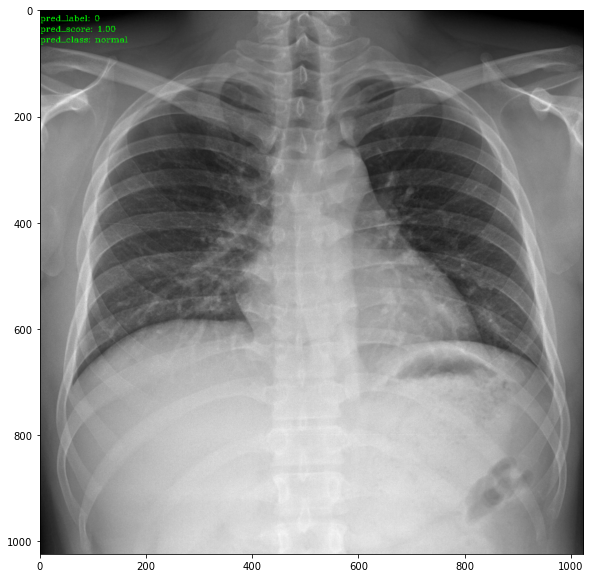

In [46]:
img = mmcv.imread('../../input/vinbigdata-1024-image-dataset/vinbigdata/test/002a34c58c5b758217ed1f584ccbcfe9.png')

model.cfg = cfg
result = inference_model(model, img)
plt.figure(figsize=(8, 6))
show_result_pyplot(model, img, result)

In [47]:
# "img_norm_cfg":"dict(mean=[124.508, 116.050, 106.438], std=[58.577, 57.310, 57.437], to_rgb=True)"
# "evaluation.metric_options": '''dict('topk' : '(1)')''',
# "optimizer" :  '''dict('type'='SGD', 'lr'='0.01', 'momentum'='0.9', 'weight_decay'='0.0001')''',
# "lr_config" : '''dict('policy'='step', 'step'='[1]')''',
# "runner" : '''dict('type'='EpochBasedRunner', 'max_epochs'='2')''',

# "data.train.type":'VinBigDataset',
#     "data.val.type" : 'VinBigDataset',
#         "data.test.type": 'VinBigDataset',   
_cfg_options = {
"classes" : './classes.txt',
"data.train.data_prefix" : '../../input/vinbigdata-1024-image-dataset/vinbigdata/train/',
"data.train.classes" : './classes.txt',
"data.train.ann_file" : './train.txt',
             
"data.val.data_prefix" : '../../input/vinbigdata-1024-image-dataset/vinbigdata/test/',
"data.val.classes" : './classes.txt',
"data.val.ann_file" : './val.txt',

"data.test.data_prefix" :  '../../input/vinbigdata-1024-image-dataset/vinbigdata/test/',
"data.test.classes" :  './classes.txt',
"data.test.ann_file" :  './test.txt',
'evaluation.metric_options.topk' : '1',
"data.samples_per_gpu":'32',
"data.workers_per_gpu" :'2',
"model.head.num_classes":'2',
"model.head.topk":"1",
"optimizer.type" : 'SGD',
"optimizer.lr" : '0.01',
"optimizer.momentum" : '0.9',
"optimizer.weight_decay" : '0.0001',
"optimizer_config.grad_clip" : "None",
"lr_config.policy": 'step',
"lr_config.step": '1',
"runner.type": "EpochBasedRunner",
"runner.max_epochs": "2",
    
"load_from" : 'checkpoints/resnext50_32x4d_batch256_imagenet_20200708-c07adbb7.pth',
"work_dir" : './vin_work_dirs_val',

"runner.max_epochs" : "20",
   
"img_norm_cfg.to_rgb" : 'True'
}
# "load_from" : 'checkpoints/resnet50_batch256_imagenet_20200708-cfb998bf.pth',
# "gpu_ids" : "range(0, 1)",
# "img_norm_cfg.mean" : "[124.508, 116.050, 106.438]",
# "img_norm_cfg.std" : "[58.577, 57.310, 57.437]",  
cfg_op = ""
for k, v in _cfg_options.items():
    cfg_op+=f"{k}='{v}' "
print(cfg_op)

classes='./classes.txt' data.train.data_prefix='../../input/vinbigdata-1024-image-dataset/vinbigdata/train/' data.train.classes='./classes.txt' data.train.ann_file='./train.txt' data.val.data_prefix='../../input/vinbigdata-1024-image-dataset/vinbigdata/test/' data.val.classes='./classes.txt' data.val.ann_file='./val.txt' data.test.data_prefix='../../input/vinbigdata-1024-image-dataset/vinbigdata/test/' data.test.classes='./classes.txt' data.test.ann_file='./test.txt' evaluation.metric_options.topk='1' data.samples_per_gpu='32' data.workers_per_gpu='2' model.head.num_classes='2' model.head.topk='1' optimizer.type='SGD' optimizer.lr='0.01' optimizer.momentum='0.9' optimizer.weight_decay='0.0001' optimizer_config.grad_clip='None' lr_config.policy='step' lr_config.step='1' runner.type='EpochBasedRunner' runner.max_epochs='20' load_from='checkpoints/resnext50_32x4d_batch256_imagenet_20200708-c07adbb7.pth' work_dir='./vin_work_dirs_val' img_norm_cfg.to_rgb='True' 


In [48]:
!python tools/test.py configs/resnext/resnext101_32x4d_b32x8_imagenet.py ./vin_work_dirs/latest.pth --out=results_resnext_20_epoch.json --options classes='./classes.txt' data.train.data_prefix='../../input/vinbigdata-1024-image-dataset/vinbigdata/train/' data.train.classes='./classes.txt' data.train.ann_file='./train.txt' data.val.data_prefix='../../input/vinbigdata-1024-image-dataset/vinbigdata/test/' data.val.classes='./classes.txt' data.val.ann_file='./val.txt' data.test.data_prefix='../../input/vinbigdata-1024-image-dataset/vinbigdata/test/' data.test.classes='./classes.txt' data.test.ann_file='./test.txt' evaluation.metric_options.topk='1' data.samples_per_gpu='32' data.workers_per_gpu='2' model.head.num_classes='2' model.head.topk='1' optimizer.type='SGD' optimizer.lr='0.01' optimizer.momentum='0.9' optimizer.weight_decay='0.0001' optimizer_config.grad_clip='None' lr_config.policy='step' lr_config.step='1' runner.type='EpochBasedRunner' runner.max_epochs='20' load_from='checkpoints/resnext50_32x4d_batch256_imagenet_20200708-c07adbb7.pth' work_dir='./vin_work_dirs_val' img_norm_cfg.to_rgb='True'

/kaggle/working/mmclassification/mmcls/apis/train.py:17: UserWarning: DeprecationWarning: EvalHook and DistEvalHook from mmcls will be deprecated.Please install mmcv through master branch.
  warnings.warn('DeprecationWarning: EvalHook and DistEvalHook from mmcls '
Use load_from_local loader
[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 3000/3000, 49.5 task/s, elapsed: 61s, ETA:     0stools/test.py:145: UserWarning: Evaluation metrics are not specified.
  warnings.warn('Evaluation metrics are not specified.')

writing results to results_resnext_20_epoch.json


In [49]:
# test_df